# 1. 숫자인식 Backpropagation설계

### 1) 8x6 숫자 디자인

In [2]:
import numpy as np

num_set = [[[0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0]],# 0
           
           [[0,0,0,1,0,0],
            [0,0,1,1,0,0],
            [0,1,0,1,0,0],
            [0,0,0,1,0,0],
            [0,0,0,1,0,0],
            [0,0,0,1,0,0],
            [0,0,0,1,0,0],
            [0,1,1,1,1,1]],# 1
           
           [[0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,0,0,0,1,0],
            [0,0,0,1,0,0],
            [0,0,1,0,0,0],
            [0,1,0,0,0,0],
            [1,1,1,1,1,1]],# 2
           
           [[0,0,0,0,0,0],
            [0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [0,0,0,0,0,1],
            [0,0,1,1,1,0],
            [0,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0]],# 3
           
           [[0,0,0,0,0,0],
            [0,0,0,0,1,0],
            [0,0,0,1,1,0],
            [0,0,1,0,1,0],
            [0,1,0,0,1,0],
            [1,1,1,1,1,1],
            [0,0,0,0,1,0],
            [0,0,0,0,1,0]],# 4
           
           [[1,1,1,1,1,1],
            [1,0,0,0,0,0],
            [1,0,0,0,0,0],
            [1,1,1,1,1,0],
            [0,0,0,0,0,1],
            [0,0,0,0,0,1],
            [0,0,0,0,0,1],
            [1,1,1,1,1,0]],# 5
           
           [[0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,0],
            [1,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0]],# 6
           
           [[0,1,1,1,1,1],
            [0,0,0,0,0,1],
            [0,0,0,0,0,1],
            [0,0,0,0,1,0],
            [0,0,0,0,1,0],
            [0,0,0,1,0,0],
            [0,0,0,1,0,0],
            [0,0,0,1,0,0]],# 7
           
           [[0,0,0,0,0,0],
            [0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0]],# 8
           
           [[0,1,1,1,1,0],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,1],
            [0,0,0,0,0,1],
            [1,0,0,0,0,1],
            [0,1,1,1,1,0]]]# 9

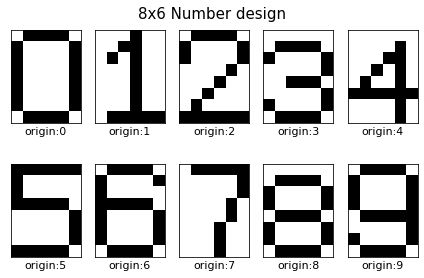

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
w, h = 6, 8
for i,j in zip(num_set, range(1,11)):
    img = Image.fromarray(np.invert(np.array(i).astype(bool)))
    plt.subplot(2,5,j)
    plt.xlabel('origin:'+str(j-1),fontsize=11)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
plt.suptitle('8x6 Number design',fontsize=15)
plt.subplots_adjust(top=0.2)
plt.tight_layout()
plt.tight_layout()
plt.tight_layout()
plt.savefig('Number.png',dpi=300)

### 2) Desired Output 설정

In [5]:
desired_output = np.array([[1,0,0,0,0,0,0,0,0,0],
                           [0,1,0,0,0,0,0,0,0,0],
                           [0,0,1,0,0,0,0,0,0,0],
                           [0,0,0,1,0,0,0,0,0,0],
                           [0,0,0,0,1,0,0,0,0,0],
                           [0,0,0,0,0,1,0,0,0,0],
                           [0,0,0,0,0,0,1,0,0,0],
                           [0,0,0,0,0,0,0,1,0,0],
                           [0,0,0,0,0,0,0,0,1,0],
                           [0,0,0,0,0,0,0,0,0,1]])

### 3) Learning phase

In [167]:
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

sigmoid = np.vectorize(sigmoid)
np.random.seed(2)
hidden_num = 50
weight_layer1 = np.random.randn(hidden_num,48)
weight_layer2 = np.random.randn(10,hidden_num)

n = 1

for step in range(1000):
    if step % 100 == 0:
        print(step*0.1,"%")
    for i in range(10):
        x = np.ravel(num_set[i])
        NET1 = np.dot(x,weight_layer1.T)
        NET1 = sigmoid(NET1)
        NET2 = np.dot(NET1,weight_layer2.T)
        NET2 = sigmoid(NET2)
        delta= [0 for _ in range(10)]
        for j in range(10):
            delta[j] = NET2[j]*(1-NET2[j])*(desired_output[i][j]-NET2[j])
        for j in range(10):
            for k in range(hidden_num):
                weight_layer2[j][k] = weight_layer2[j][k] + n*delta[j]*NET1[k]
        for j in range(hidden_num):
            weight_mul = 1
            for m in range(10):
                weight_mul *= weight_layer2[m][j]
            for k in range(48):
                weight_layer1[j][k] = weight_layer1[j][k] + n*NET1[k]*(1-NET1[k])*delta[j//5]*weight_mul*x[k]

0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


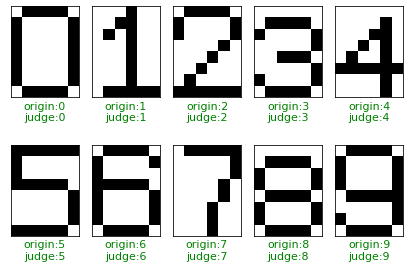

In [178]:
recognition = []
for i in range(10):
    x = np.ravel(num_set[i])
    NET1 = np.dot(x,weight_layer1.T)
    NET1 = sigmoid(NET1)
    NET2 = np.dot(NET1,weight_layer2.T)
    NET2 = sigmoid(NET2)
    recognition.append(np.argmax(NET2))
    
for i in range(10):
    img = Image.fromarray(np.invert(np.array(num_set[i]).astype(bool)))
    plt.subplot(2,5,i+1)
    if i == recognition[i]:
        plt.xlabel('origin:'+str(i)+'\njudge:'+str(recognition[i])+'\n',fontsize=11,color='green')
    else:
        plt.xlabel('origin:'+str(i)+'\njudge:'+str(recognition[i])+'\n',fontsize=11,color='red')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
plt.subplots_adjust(top=0.2)
plt.tight_layout()
plt.savefig('Recognition.png',dpi=300)

### 4) Noise Number 

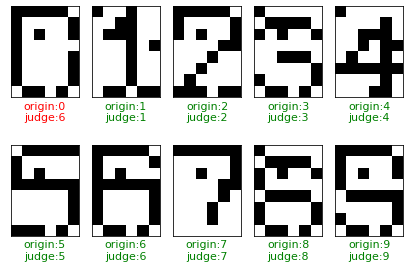

In [194]:
noise_num_set = np.copy(np.array(num_set))

for i in range(10):
    np.random.seed(2)
    random_noise_num = np.random.randint(4,7,size=1)
    random_noise_w = np.random.randint(w, size=random_noise_num)
    random_noise_h = np.random.randint(h, size=random_noise_num)
    for x,y in zip(random_noise_w,random_noise_h):
        noise_num_set[i][y][x] = not noise_num_set[i][y][x]

recognition = []
for i in range(10):
    x = np.ravel(noise_num_set[i])
    NET1 = np.dot(x,weight_layer1.T)
    NET1 = sigmoid(NET1)
    NET2 = np.dot(NET1,weight_layer2.T)
    NET2 = sigmoid(NET2)
    recognition.append(np.argmax(NET2))
            
for i in range(10):
    img = Image.fromarray(np.invert(noise_num_set[i].astype(bool)))
    plt.subplot(2,5,i+1)
    if i == recognition[i]:
        plt.xlabel('origin:'+str(i)+'\njudge:'+str(recognition[i])+'\n',fontsize=11,color='green')
    else:
        plt.xlabel('origin:'+str(i)+'\njudge:'+str(recognition[i])+'\n',fontsize=11,color='red')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
plt.subplots_adjust(top=0.2)
plt.tight_layout()
plt.savefig('Noise Recognition.png',dpi=300)

### 5) Accuracy measurement

Accuracy :82.0%


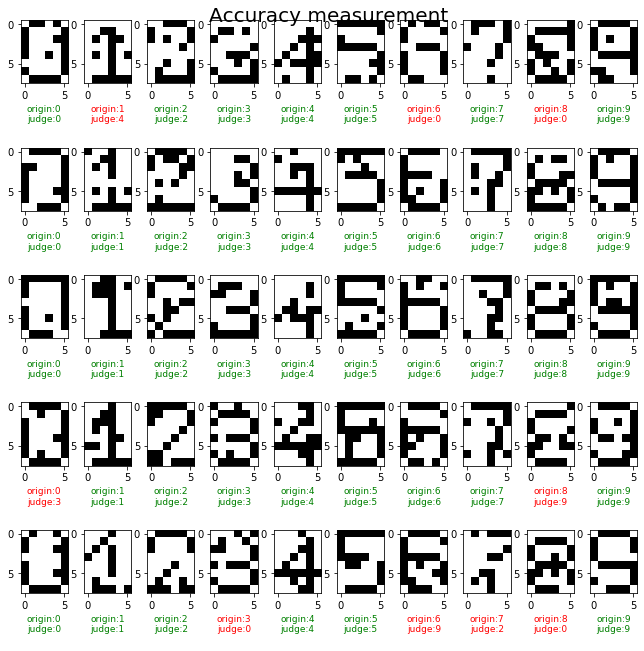

In [224]:
def accuracy_measurement(noise_min = 4, noise_max = 7,plot_on = 1):
    noise_num_temp = np.copy(np.array(num_set))
    noise_num_dummy = np.empty((5,10,8,6))
    for i in range(5):
        noise_num_dummy[i] = np.copy(noise_num_temp)
        for j in range(10):
            random_noise_num = np.random.randint(noise_min,noise_max,size=1)
            random_noise_w = np.random.randint(w, size=random_noise_num)
            random_noise_h = np.random.randint(h, size=random_noise_num)
            for x,y in zip(random_noise_w,random_noise_h):
                noise_num_dummy[i][j][y][x] = not noise_num_dummy[i][j][y][x]

    recognition_dummy = np.empty((10,5))

    for i in range(10):
        for j in range(5):
            result_NET1 = np.dot(np.ravel(noise_num_dummy[j][i]),weight_layer1.T)
            result_NET1 = sigmoid(result_NET1)
            result_NET2 = np.dot(result_NET1,weight_layer2.T)
            result_NET2 = sigmoid(result_NET2)
            recognition_dummy[i][j] = np.argmax(result_NET2)
    recognition_dummy = recognition_dummy.astype(int)

    correct_num = 0
    if plot_on:
        plt.figure(figsize=(9,9))
    for i in range(10):
        for j in range(5):
            img = Image.fromarray(np.invert(noise_num_dummy[j][i].astype(bool)))
            if plot_on:
                plt.subplot(5,10,j*10+i+1)
            if i == recognition_dummy[i][j]:
                if plot_on:
                    plt.xlabel('origin:'+str(i)+'\njudge:'+str(recognition_dummy[i][j])+'\n',fontsize=9,color='green')
                correct_num+=1
            else:
                if plot_on:
                    plt.xlabel('origin:'+str(i)+'\njudge:'+str(recognition_dummy[i][j])+'\n',fontsize=9,color='red')
            if plot_on:
                plt.imshow(img)
    if plot_on:
        plt.suptitle('Accuracy measurement',fontsize=20,y=1.0)
        plt.subplots_adjust(top=0.3,wspace=None)
        plt.tight_layout()
        plt.savefig('Accuracy.png',dpi=300)
    return correct_num/50*100
accuracy = accuracy_measurement()
print('Accuracy :'+str(accuracy)+'%')

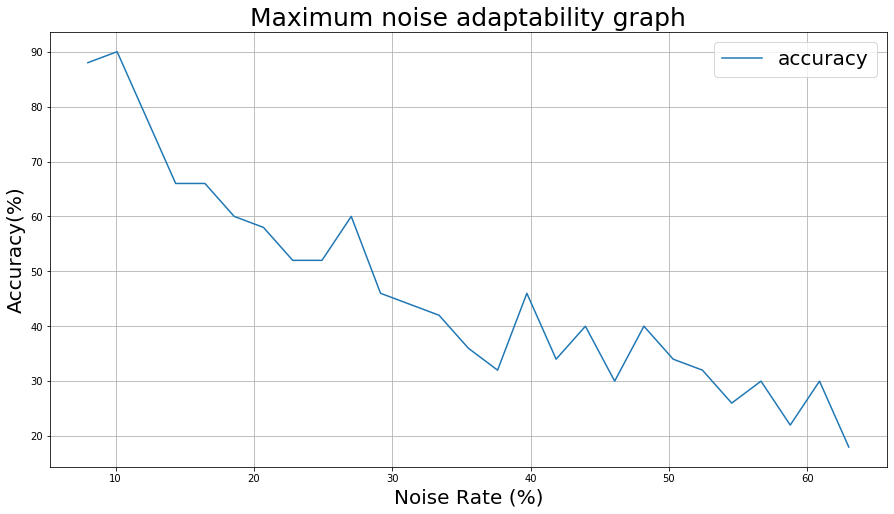

In [228]:
plt.figure(figsize=(15,8))
acc = []
for i in range(4,31):
    acc.append(accuracy_measurement(i,i+1,plot_on=0))
plt.plot(np.linspace(8,63,27),acc,label='accuracy')
plt.title('Maximum noise adaptability graph',fontsize=25)
plt.ylabel('Accuracy(%)',fontsize=20)
plt.xlabel('Noise Rate (%)',fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.savefig('Maximum noise adaptability graph.png',dpi=300)
plt.show()